In [55]:
import pandas as pd
import numpy as np
# train_set_6200
train_data_pd = pd.read_csv('train_set_6200.csv', encoding='euc-kr')
train_data =[] 

for index, rows in train_data_pd.iterrows(): 
    my_list1 = [rows.UserName, rows.Contents, rows.Label] 
    train_data.append(my_list1) 

#print(train_data) 
#test_set_6200
test_data_pd = pd.read_csv('test_set_6200.csv', encoding='euc-kr')
test_data =[] 

for index, rows in test_data_pd.iterrows(): 
    my_list2 = [rows.UserName, rows.Contents, rows.Label] 
    test_data.append(my_list2) 

#print(test_data) 

In [56]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

4340
3
1860
3


In [57]:
my_list2

['woor****', '너무 약하다.몇천도 아니고 몇백? 그러지말고 거리로 나와라! 용기가 없다면 국민들과 함께하자!', 1]

In [58]:
from konlpy.tag import Okt
okt = Okt()

In [59]:
import json
import os
from pprint import pprint
import time
start = time.time()

def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('train_5936.json'):
    with open('train_5936.json', encoding = 'utf-8') as f:
        train_docs = json.load(f)
    with open('test_5936.json', encoding = 'utf-8') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_5936.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_5936.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# 예쁘게(?) 출력하기 위해서 pprint 라이브러리 사용
pprint(train_docs[0])
print("time :", time.time() - start)

(['조국/Noun',
  '패밀리/Noun',
  '여러/Noun',
  '사람/Noun',
  '골로/Noun',
  '가게/Noun',
  '하다/Verb',
  '../Punctuation',
  '조/Modifier',
  '민씨/Noun',
  '의/Josa',
  '입학/Noun',
  '도/Josa',
  '법/Noun',
  '과/Josa',
  '원칙/Noun',
  '에/Josa',
  '맞다/Verb',
  '자다/Verb',
  '처리/Noun',
  '해주다/Verb'],
 1)
time : 29.171605348587036


In [60]:
pprint(train_docs[1])

(['판사/Noun',
  '들/Suffix',
  '은/Josa',
  '다/Adverb',
  '정의/Noun',
  '로운/Josa',
  '줄/Noun',
  '알다/Verb',
  'ㅡ/KoreanParticle',
  '이렇다/Adjective',
  '판사/Noun',
  '도/Josa',
  '있다/Adjective',
  'ㅡ/KoreanParticle',
  '교과서/Noun',
  '에/Josa',
  '이름/Noun',
  '좀/Noun',
  '올리다/Verb',
  'ㅡ/KoreanParticle',
  '판사/Noun',
  '들/Suffix',
  '의/Josa',
  '흑역사/Noun'],
 1)


In [61]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

152846


In [62]:
import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

152846
11320
[('하다/Verb', 5245),
 ('./Punctuation', 4351),
 ('이/Josa', 3489),
 ('을/Josa', 2701),
 ('들/Suffix', 2649),
 ('은/Josa', 1987),
 ('에/Josa', 1945),
 ('조국/Noun', 1794),
 ('가/Josa', 1779),
 ('의/Josa', 1676)]


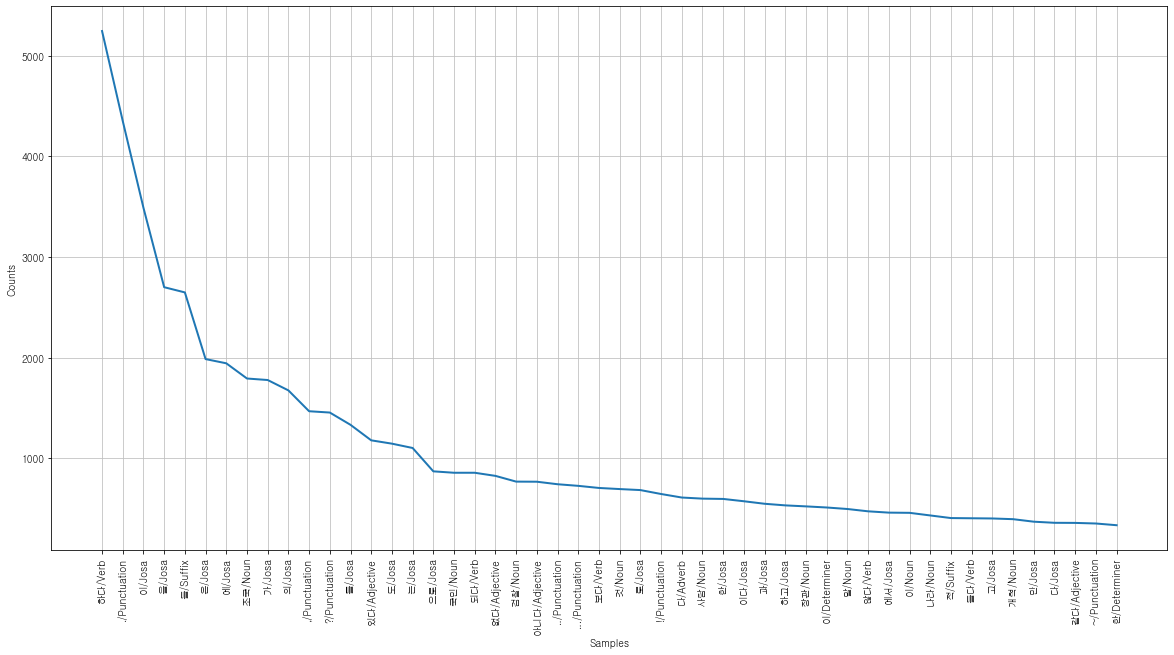

In [63]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

In [74]:
# 시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.
selected_words = [f[0] for f in text.vocab().most_common(11320)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

start = time.time()
print("time :", time.time() - start)

time : 0.0


In [75]:
import numpy as np

x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [76]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(11320,)))
model.add(layers.Dense(64, activation='relu', input_shape=(11320,)))
model.add(layers.Dense(64, activation='relu', input_shape=(11320,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 4340 samples
Epoch 1/10
4340/4340 [==============================] - 1s 168us/sample - loss: 0.6752 - binary_accuracy: 0.6150
Epoch 2/10
4340/4340 [==============================] - 0s 50us/sample - loss: 0.5328 - binary_accuracy: 0.7781
Epoch 3/10
4340/4340 [==============================] - 0s 50us/sample - loss: 0.3529 - binary_accuracy: 0.8818
Epoch 4/10
4340/4340 [==============================] - 0s 51us/sample - loss: 0.2186 - binary_accuracy: 0.9376
Epoch 5/10
4340/4340 [==============================] - 0s 50us/sample - loss: 0.1346 - binary_accuracy: 0.9608
Epoch 6/10
4340/4340 [==============================] - 0s 58us/sample - loss: 0.0919 - binary_accuracy: 0.9770
Epoch 7/10
4340/4340 [==============================] - 0s 51us/sample - loss: 0.0557 - binary_accuracy: 0.9878
Epoch 8/10
4340/4340 [==============================] - 0s 49us/sample - loss: 0.0456 - binary_accuracy: 0.9896
Epoch 9/10
4340/4340 [==============================] - 0s 48us/sample - loss: 0.

In [67]:
results

[1.0368814168437834, 0.7575269]

In [79]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 bosu 리뷰".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 jinbo 리뷰".format(review, (1 - score) * 100))

In [80]:
predict_pos_neg("검찰개혁")
predict_pos_neg("대학생들아. 김성태 딸 부정취업과 나경원 황교안 자녀 의혹은 별로 안 궁금하니?")

[검찰개혁]는 68.97% 확률로 jinbo 리뷰
[대학생들아. 김성태 딸 부정취업과 나경원 황교안 자녀 의혹은 별로 안 궁금하니?]는 99.41% 확률로 jinbo 리뷰


In [81]:
predict_pos_neg("대깨문들 아직도 대가리 덜 꺠졌네")
predict_pos_neg("아니!  이제는 증거인멸까지 하네? 이런 상황에서 장관 욕심을 아직도 버리지 않는다?")
predict_pos_neg("문쩝쩝 문어벙 삶은 소대가리")
predict_pos_neg("진짜 미친 게 빨개이 새끼들 내년총선에 모조리 쳐 도살하자!!")
predict_pos_neg("한번도 경험해보지 못한 나라인가?")
predict_pos_neg("조국이란이름쓰지마라    열받는다  여기는 부정부패 반칙만있는  대한만국")
predict_pos_neg("사시노패스를 중심으로 사이코패스, 소시오패스들 다 모였네...ㅋㅋㅋ")
predict_pos_neg("그래서 특검을해야된다~~")

[대깨문들 아직도 대가리 덜 꺠졌네]는 98.83% 확률로 bosu 리뷰
[아니!  이제는 증거인멸까지 하네? 이런 상황에서 장관 욕심을 아직도 버리지 않는다?]는 95.41% 확률로 bosu 리뷰
[문쩝쩝 문어벙 삶은 소대가리]는 85.66% 확률로 bosu 리뷰
[진짜 미친 게 빨개이 새끼들 내년총선에 모조리 쳐 도살하자!!]는 94.58% 확률로 bosu 리뷰
[한번도 경험해보지 못한 나라인가?]는 96.83% 확률로 bosu 리뷰
[조국이란이름쓰지마라    열받는다  여기는 부정부패 반칙만있는  대한만국]는 99.72% 확률로 bosu 리뷰
[사시노패스를 중심으로 사이코패스, 소시오패스들 다 모였네...ㅋㅋㅋ]는 99.86% 확률로 bosu 리뷰
[그래서 특검을해야된다~~]는 94.49% 확률로 bosu 리뷰


In [82]:
predict_pos_neg("조국 힘내세요")
predict_pos_neg("조국 구속")

[조국 힘내세요]는 71.76% 확률로 bosu 리뷰
[조국 구속]는 82.47% 확률로 jinbo 리뷰


In [83]:
data = pd.read_csv('C:/Users/user/Desktop/이데일리.csv', encoding='cp949')
data = data["Contents"]

for x in data:
    predict_pos_neg(x)
    

[짜고치는 고스톱...삼척동자도 알겠네...달창들의 놀이터 국민청원 폐지청원합니다.]는 99.99% 확률로 bosu 리뷰
[앞으로는 범죄 의심 있어도 수사하면 안되겠구나. 와 ㅡ 광신도들 대단하다. 요즘은 스스로 쪽팔리지 않을까?]는 67.04% 확률로 jinbo 리뷰
[조국 일가보다 인권.특혜 누릴대로  다 누리면서 조사받은 사람있으면 나와보라해라]는 92.93% 확률로 bosu 리뷰
[좌파 빨갱들에 억지논리 대단하다~~~]는 64.27% 확률로 jinbo 리뷰
[조국 가족 인권 침해라니? 대부분의 국민들이 보기에 조국가족은 일반시민은 상상도 할 수 없는 특권을 누리고 있다. 이런 국민청원을 하는 철면피가 누구인가? 그냥 진영논리에 따라 진실을 외면하는 이런 인간들 때문에 대한민국의 민주주의가 후퇴하고 정의와 공정이 사라지고 있다. 청와대는 진보의 놀이터가 된 국민청원 게시판을 없애야 한다.]는 100.00% 확률로 bosu 리뷰
[범죄자만 인권이 있는 나라]는 73.95% 확률로 bosu 리뷰
[니네만 인권있고 다른 사람들은 당연한거구나 특권의식 쩐다
얼굴 모자이크해줘 영장기각파티 해줘
무슨 ? 뭘 해줘야 하는데? 수사에 협조 안하고 맨날 여편네는 중간에 나가고 시간끌고 서방놈은 입 처 다물고 있고
법꾸라지가 대한민국 흙탕물로 만들며
청와대도 임명강행 책임져야 할 것들이]는 100.00% 확률로 bosu 리뷰
[똘똘뭉치는거 하나는 끝내준다 .]는 91.99% 확률로 bosu 리뷰
[간신히 인원수 충족했네. 애들썼다. 여기저기서 끌어모으고 중복으로 하고 했을텐데ㅡㅡㅡ]는 86.08% 확률로 bosu 리뷰
[조빠, 문빠 없어져야 대한민국 산다.]는 94.81% 확률로 bosu 리뷰
[황제 대우가 인권 침해냐?! 일반 국민은? 해충들이 따로 없네!]는 56.11% 확률로 bosu 리뷰
[조국가족의 행태는 상식을 벗어난 수준이다. 참 이상한 세상이 되어가고 있다.]는 81.63% 확률로 jinbo 리뷰
[그럼 검찰에 불려간적 있는 우리나라 국민들 전부 다 인권침해